# 01. Знакомство с `torch.Tensor`

V 0.1 04.02.2021

### Волкова Татьяна ПИ19-2

---

При решении данных задач не подразумевается использования циклов или генераторов Python, если в задании не сказано обратного. Решение должно опираться на использование функционала библиотеки `torch`.

[PyTorch documentation](https://pytorch.org/docs/stable/#pytorch-documentation)

In [ ]:
import torch

## 1.1 Создание тензоров и выполнение базовых операций над ними

[Документация по функциям для создания тензоров](https://pytorch.org/docs/stable/torch.html#creation-ops)

[Документация по функциям для работы с индексами](https://pytorch.org/docs/stable/torch.html#indexing-slicing-joining-mutating-ops)

1.1.1 Создайте двумерный тензор размера (8, 8). Используя как можно меньше операций, добейтесь расстановки кодов "шахматных фигур".

Ожидаемый результат:

```
[[-4., -3., -2., -6., -5., -2., -3., -4.],
 [-1., -1., -1., -1., -1., -1., -1., -1.],
 [0., 0., 0., 0., 0., 0., 0., 0.],
 [0., 0., 0., 0., 0., 0., 0., 0.],
 [0., 0., 0., 0., 0., 0., 0., 0.],
 [0., 0., 0., 0., 0., 0., 0., 0.],
 [1., 1., 1., 1., 1., 1., 1., 1.],
 [4., 3., 2., 6., 5., 2., 3., 4.]]

```

In [ ]:
x = torch.zeros(8, 8, dtype=torch.float16)
x[0] = torch.tensor([-4, -3, -2, -6, -5, -2, -3, -4]) 
x[1] = torch.ones(1, 8) * -1
x[6]= -x[1]
x[7] = -x[0] 
print(x)

tensor([[-4., -3., -2., -6., -5., -2., -3., -4.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 4.,  3.,  2.,  6.,  5.,  2.,  3.,  4.]], dtype=torch.float16)


1.1.2 Средствами `torch` рассчитать произведения четных чисел от 2 до 20 на ближайшие к ним бОльшие нечетные числа.

In [ ]:
even = torch.arange(2, 21, 2)
odd = torch.arange(3, 22, 2) 
print(even * odd)

tensor([  6,  20,  42,  72, 110, 156, 210, 272, 342, 420])


1.1.3 Создать тензор размера 11x7 вида: [[1, 2, 3, ..., 7], [11, 12, 13, ..., 17], [21, 22, 23, ..., 27], ..., [101, 102, 103, ..., 107]]

In [ ]:
a0 =  torch.arange(1, 8)
a1 = a0 + 10
a2 = a0 + 2 * 10
a0, a1, a2

(tensor([1, 2, 3, 4, 5, 6, 7]),
 tensor([11, 12, 13, 14, 15, 16, 17]),
 tensor([21, 22, 23, 24, 25, 26, 27]))

In [ ]:
x = torch.arange(1, 111)
x = x.view(-1, 11)[:, :7]
x

tensor([[  1,   2,   3,   4,   5,   6,   7],
        [ 12,  13,  14,  15,  16,  17,  18],
        [ 23,  24,  25,  26,  27,  28,  29],
        [ 34,  35,  36,  37,  38,  39,  40],
        [ 45,  46,  47,  48,  49,  50,  51],
        [ 56,  57,  58,  59,  60,  61,  62],
        [ 67,  68,  69,  70,  71,  72,  73],
        [ 78,  79,  80,  81,  82,  83,  84],
        [ 89,  90,  91,  92,  93,  94,  95],
        [100, 101, 102, 103, 104, 105, 106]])

1.1.4 Написать функцию, которая для целых значений `n` и `m` будет возвращать тензор размера `n`x`m`, заполненный текстурой размера 2x2, состоящей из следующих значений:

```
0 1

2 3

```

Пример для n = 4 и m = 5:

```
0 1 0 1 0

2 3 2 3 2

0 1 0 1 0

2 3 2 3 2
```

In [ ]:
# ???

def tens(n, m):
  n = int(n) // 2
  m = int(m) // 2
  a = torch.arange(0, 4).view(2, 2)
  b = torch.cat([a]*n, 0)
  result = torch.cat([b]*m, 1)
  return result

tens(input(), input())

6
6


tensor([[0, 1, 0, 1, 0, 1],
        [2, 3, 2, 3, 2, 3],
        [0, 1, 0, 1, 0, 1],
        [2, 3, 2, 3, 2, 3],
        [0, 1, 0, 1, 0, 1],
        [2, 3, 2, 3, 2, 3]])

1.1.5 Сгенерировать двумерный тензор `t` размерности (4, 7), состоящий из случайных действительных чисел, равномерно распределенных в дипазоне от 0 до 20. Нормализовать значения массива с помощью преобразования вида $ax+b$ так, что после нормализации максимальный элемент масива будет равен 1.0, минимальный 0.0

In [ ]:
# целые числа
x = torch.randint(0, 21, (4, 7))
print(x)
x = (x-x.min())/(x.max()-x.min())
x

tensor([[ 1,  3, 18, 11,  0, 10,  4],
        [19, 11, 14,  0,  3, 14,  5],
        [ 5,  5,  3,  7, 18,  0,  1],
        [17, 16,  5, 14, 19,  0,  6]])


tensor([[0.0526, 0.1579, 0.9474, 0.5789, 0.0000, 0.5263, 0.2105],
        [1.0000, 0.5789, 0.7368, 0.0000, 0.1579, 0.7368, 0.2632],
        [0.2632, 0.2632, 0.1579, 0.3684, 0.9474, 0.0000, 0.0526],
        [0.8947, 0.8421, 0.2632, 0.7368, 1.0000, 0.0000, 0.3158]])

In [ ]:
x = torch.rand((4, 7)) * 20
print(x)
x = (x-x.min())/(x.max()-x.min())
x

tensor([[11.4746, 19.1185,  0.2766,  9.1041, 12.4546, 13.2391, 15.1336],
        [17.7175, 14.1771, 16.4939,  4.1994, 19.9328,  9.0524, 10.5987],
        [15.5537, 13.5647, 17.1871, 17.4834,  4.4239,  9.3048, 19.0798],
        [ 8.3963,  6.1068, 10.0943, 13.4751,  1.9628,  5.7701,  7.8734]])


tensor([[0.5697, 0.9586, 0.0000, 0.4491, 0.6195, 0.6595, 0.7558],
        [0.8873, 0.7072, 0.8250, 0.1996, 1.0000, 0.4465, 0.5251],
        [0.7772, 0.6760, 0.8603, 0.8754, 0.2110, 0.4593, 0.9566],
        [0.4131, 0.2966, 0.4995, 0.6715, 0.0858, 0.2795, 0.3865]])

[Random Sampling](https://pytorch.org/docs/stable/torch.html#random-sampling)

[Distributions](https://pytorch.org/docs/stable/distributions.html)

1.1.6 Задать два двумерных тензора `ar1` и `ar2` размерности (4, 7), состоящих из случайных целых чисел в пределах от 0 до 10. Построить двумерный тензор размерности (4, 7), каждый элемент которого представляет собой максимум из двух значений, находящихся на аналогичной позиции в тензорах `ar1`, `ar2`.

[Reductions ops](https://pytorch.org/docs/stable/torch.html#reduction-ops)

In [ ]:
arr1 = torch.randint(0, 11, (4, 7))
arr2 = torch.randint(0, 11, (4, 7))
print(arr1,'\n', arr2)

tensor([[ 8,  0,  6,  5,  6,  6,  7],
        [ 5,  1,  7,  5,  7,  4,  5],
        [ 4,  8,  4,  3,  5,  6,  5],
        [ 2,  5,  8,  2,  4, 10,  3]]) 
 tensor([[8, 3, 5, 3, 5, 2, 9],
        [8, 6, 1, 2, 2, 7, 9],
        [9, 8, 1, 2, 1, 9, 9],
        [1, 3, 1, 1, 4, 5, 9]])


In [ ]:
(arr1 > arr2) * arr1 + (arr1 <= arr2) * arr2

tensor([[ 8,  3,  6,  5,  6,  6,  9],
        [ 8,  6,  7,  5,  7,  7,  9],
        [ 9,  8,  4,  3,  5,  9,  9],
        [ 2,  5,  8,  2,  4, 10,  9]])

In [ ]:
# встроенная функция torch
torch.fmax(arr1, arr2)

tensor([[ 8,  3,  6,  5,  6,  6,  9],
        [ 8,  6,  7,  5,  7,  7,  9],
        [ 9,  8,  4,  3,  5,  9,  9],
        [ 2,  5,  8,  2,  4, 10,  9]])

1.1.7 Создать тензор из 20 случайных целых чисел от 0 до 100. Получить второе сверху значение в тензоре. Определить индекс этого значения.

In [ ]:
x = torch.randint(0, 101, (1, 20))
x

tensor([[24, 55, 91, 20, 22, 97, 43, 52, 17, 95,  7, 14, 92, 88, 19, 71, 76,  9,
         12, 12]])

In [ ]:
x.sort()

torch.return_types.sort(
values=tensor([[ 7,  9, 12, 12, 14, 17, 19, 20, 22, 24, 43, 52, 55, 71, 76, 88, 91, 92,
         95, 97]]),
indices=tensor([[10, 17, 19, 18, 11,  8, 14,  3,  4,  0,  6,  7,  1, 15, 16, 13,  2, 12,
          9,  5]]))

In [ ]:
x.sort().indices[0, -2]

tensor(9)

## 1.2 Распространение

[Numpy broadcasting](https://numpy.org/devdocs/user/theory.broadcasting.html)

[Torch broadcasting](https://pytorch.org/docs/stable/notes/broadcasting.html)

1.2.1 Создать тензор 11x7 вида: `[[1, 2, 3, ..., 7], [11, 12, 13, ..., 17], [21, 22, 23, ..., 27], ..., [101, 102, 103, ..., 107]]`. При решении задачи применить технику распространения.

In [ ]:
a =  torch.arange(1, 8)
b = torch.arange(0, 110, 10).view(11, 1) 
print(a, '\n', b)
b + a


  # a -> 1 2 3 ...
  #      1 2 3 ...
  #      1 2 3 ...
  #      ...
  # b -> 10 10 10 ...
  #      20 20 20 ...
  #      30 30 30 ...
  #      ...

tensor([1, 2, 3, 4, 5, 6, 7]) 
 tensor([[  0],
        [ 10],
        [ 20],
        [ 30],
        [ 40],
        [ 50],
        [ 60],
        [ 70],
        [ 80],
        [ 90],
        [100]])


tensor([[  1,   2,   3,   4,   5,   6,   7],
        [ 11,  12,  13,  14,  15,  16,  17],
        [ 21,  22,  23,  24,  25,  26,  27],
        [ 31,  32,  33,  34,  35,  36,  37],
        [ 41,  42,  43,  44,  45,  46,  47],
        [ 51,  52,  53,  54,  55,  56,  57],
        [ 61,  62,  63,  64,  65,  66,  67],
        [ 71,  72,  73,  74,  75,  76,  77],
        [ 81,  82,  83,  84,  85,  86,  87],
        [ 91,  92,  93,  94,  95,  96,  97],
        [101, 102, 103, 104, 105, 106, 107]])

1.2.2 Вычесть одномерный тензор `b_1d` из двухмерного тензора `a_2d`, так, чтобы каждый элемент одномерного тензора вычитался из всех элементов соответствующих строк двумерного тензора.

_Пример:_

Для входа:
```python
a_2d = torch.tensor([[3,3,3],[4,4,4],[5,5,5]])
b_1d = torch.tensor([1,2,3])
```

Ожидается резульат:

```python
[[2 2 2]
 [2 2 2]
 [2 2 2]]
```

In [ ]:
a_2d = torch.tensor([[3,3,3],[4,4,4],[5,5,5]])
b_1d = torch.tensor([1,2,3])
a_2d - b_1d.view(3,1)

tensor([[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]])

## 1.3 Индексы, маскирование и прихотливое индексирование

[Документация по функциям для работы с индексами](https://pytorch.org/docs/stable/torch.html#indexing-slicing-joining-mutating-ops)

1.3.1 Получить индексы, для которых элементы тензоров `a` и `b` совпадают.

_Пример:_

Для входа:
```python
a = torch.tensor([1,2,3,2,3,4,3,4,5,6])
b = torch.tensor([7,2,10,2,7,4,9,4,9,8])
```

Ожидается резульат:

```python
tensor([1, 3, 5, 7])
```

In [ ]:
a = torch.tensor([1,2,3,2,3,4,3,4,5,6])
b = torch.tensor([7,2,10,2,7,4,9,4,9,8])
torch.argwhere(a == b).view(1, -1)[0]


tensor([1, 3, 5, 7])

1.3.2 Инвертировать порядок элементов в двумерном тензоре `torch.arange(9).view(3,3)`.

Ожидаемый результат:


```python
tensor([[8, 7, 6],
       [5, 4, 3],
       [2, 1, 0]])
```

In [ ]:
x = torch.arange(9).view(3,3)
x[::-1, ::-1]

ValueError: ignored

In [ ]:
# а в numpy так работает
import numpy as np

x_np = np.arange(9).reshape(3, 3)
print(x_np)
x_np[::-1, ::-1]

[[0 1 2]
 [3 4 5]
 [6 7 8]]


array([[8, 7, 6],
       [5, 4, 3],
       [2, 1, 0]])

In [ ]:
# встроенная функция torch
x = torch.arange(9).view(3,3)
x.flip(0).flip(1)

tensor([[8, 7, 6],
        [5, 4, 3],
        [2, 1, 0]])

In [ ]:
#при помощи индексов
x[[2,1,0]][:,[2,1,0]]

tensor([[8, 7, 6],
        [5, 4, 3],
        [2, 1, 0]])

1.3.3 Из входного тензора a получить только элементы, находящиеся в диапазоне от 5 до 10.

_Пример:_

Для входа:
```python
a = torch.tensor([2, 6, 1, 9, 10, 3, 27])
```

Ожидается результат:

```python
tensor([6, 9, 10])
```

In [ ]:
a = torch.tensor([2, 6, 1, 9, 10, 3, 27])
a[(a>=5) & (a<=10)]

tensor([ 6,  9, 10])

1.3.4 Поменять местами столбец 1 и 2 тензора `torch.arange(9).reshape(3,3)`

In [ ]:
x = torch.arange(9).reshape(3,3)
print(x)
x[:, [0, 2, 1]]

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])


tensor([[0, 2, 1],
        [3, 5, 4],
        [6, 8, 7]])

1.3.5 Создать тензор 8 на 10 из случайных целых чисел из диапазона от 0 до 10 и найти в ней строку (ее индекс и вывести саму строку), в которой сумма значений минимальна.

In [ ]:
x = torch.randint(0, 11, [8, 10])
print(x)
#print(x.sum(1))
ind_min = x.sum(1).argmin()
ind_min, x[ind_min]

tensor([[ 0,  3,  4,  4,  5,  0,  9,  1,  0,  6],
        [ 5,  9,  2,  0,  9,  8,  1, 10,  3,  4],
        [ 9,  0,  0,  3,  3,  4,  1,  0, 10,  6],
        [ 9,  5,  9, 10, 10,  2,  4,  9,  7,  0],
        [ 6,  6,  7,  1,  9,  5,  3, 10, 10,  0],
        [ 9,  1,  8,  3, 10, 10,  8, 10,  4,  9],
        [ 5,  6,  3,  2,  3, 10,  1,  0,  6,  9],
        [ 6,  8,  9,  1,  3,  8,  4,  4,  0,  8]])


(tensor(0), tensor([0, 3, 4, 4, 5, 0, 9, 1, 0, 6]))

1.3.6 Cоздать тензор из 20 случайных целых чисел от 0 до 100. Обрезать значения тензора (заменить значения, выходящие за диапазон, на крайние значения) снизу по значению 30, сверху по значению 70.

In [ ]:
x = torch.randint(0, 100, [20])
print(x)
x[x<30] = 30
x[x>70] = 70
x

tensor([53, 70,  9, 11, 29, 21, 20,  2,  4,  9, 17, 70, 46, 15, 86, 85,  9, 27,
        68, 33])


tensor([53, 70, 30, 30, 30, 30, 30, 30, 30, 30, 30, 70, 46, 30, 70, 70, 30, 30,
        68, 33])

1.3.7 Создать два тензора размера 30 на 3 из случайных целых чисел из диапазона от 0 до 10 и найти все значения первого тензора, которые больше соответсвующих (по расположению) значений второго тензора. Подсчитать сумму этих значений.

In [ ]:
a = torch.randint(0, 11, (30, 3))
b = torch.randint(0, 11, (30, 3))
#print(a, b)
a[a>b].sum()

tensor(265)

1.3.8 При помощи прихотливого индексирования для двухмерного массива размерности (20, 20), состоящего из случайных целых чисел в пределах от 0 до 10 получить массив элементов находящихся на диагонали, проходящей над основной диагональю.

In [ ]:
x = torch.randint(0, 11, (20, 20))
# основная 00 11 22  
# над ней 01 12 23
n = torch.arange(x.size()[0]-1)
m = torch.arange(x.size()[1]-1) + 1
x[n, m]

tensor([9, 7, 5, 8, 5, 7, 2, 9, 0, 3, 5, 5, 0, 7, 8, 9, 8, 3, 8])

In [ ]:
x = torch.randint(0, 11, (6, 6))
print(x)
# основная 00 11 22  
# над ней 01 12 23
n = torch.arange(x.size()[0]-1)
m = torch.arange(x.size()[1]-1) + 1
x[n, m]

tensor([[10, 10,  1,  6, 10,  9],
        [ 2,  7,  9,  8,  4,  1],
        [ 9,  2,  9,  5,  4,  0],
        [ 5,  7,  1,  1,  6,  9],
        [ 3,  7,  4,  2,  1,  6],
        [ 1,  6,  0,  8,  1,  1]])


tensor([10,  9,  5,  6,  6])

1.3.9 Задать два двухмерных тензора `ar1` и `ar2` размерности (5, 10), состоящих из случайных целых чисел в пределах от 0 до 10. Удвоить все значения `ar1`, которые совпадают со значениями `ar2`, расположенными на аналогичных позициях.

In [ ]:
ar1 = torch.randint(0, 11, (5, 10))
ar2 = torch.randint(0, 11, (5, 10))
print(ar1, '\n', ar2)
ar1[ar1==ar2] = ar1[ar1==ar2] * 2
ar1

tensor([[ 2,  4, 10,  3,  1,  6,  6, 10,  2,  7],
        [10,  9,  2,  4, 10,  7,  2,  0,  9,  4],
        [ 1, 10, 10,  9,  0,  9,  5, 10,  1,  9],
        [ 2,  7, 10,  3,  1,  8,  9,  4,  4,  4],
        [ 1, 10,  1,  4,  4,  4,  1, 10,  6,  7]]) 
 tensor([[ 6,  0,  8,  0,  3,  1,  3,  1,  6,  5],
        [ 2,  7,  0,  2,  2,  6,  6, 10,  5,  1],
        [ 5,  1,  2,  5, 10,  5,  7,  4,  5,  9],
        [ 3,  9,  9,  4,  2,  8,  1,  4,  4,  4],
        [ 8,  1,  8,  9,  8,  1,  8,  7,  0,  6]])


tensor([[ 2,  4, 10,  3,  1,  6,  6, 10,  2,  7],
        [10,  9,  2,  4, 10,  7,  2,  0,  9,  4],
        [ 1, 10, 10,  9,  0,  9,  5, 10,  1, 18],
        [ 2,  7, 10,  3,  1, 16,  9,  8,  8,  8],
        [ 1, 10,  1,  4,  4,  4,  1, 10,  6,  7]])

1.3.10 Заданы три двухмерных тензора `ar1`, `ar2` и `ar3` размерности (4, 7), состоящие из случайных целых чисел в пределах от 0 до 10. Обнулить все элементы `ar1`, которые больше соответствующих (находящихся в соответствующих позициях) элементов `ar2` и меньше соответствующих элементов `ar3`.

In [ ]:
ar1 = torch.randint(0, 11, (4, 7))
ar2 = torch.randint(0, 11, (4, 7))
ar3 = torch.randint(0, 11, (4, 7))
print(f'{ar1}\n{ar2}\n{ar3}')
ar1[(ar1>ar2) & (ar1<ar3)] = 0
ar1

tensor([[ 1, 10,  3,  3,  9,  0,  4],
        [ 2,  1,  5,  1,  9,  0,  8],
        [ 4, 10, 10,  9,  0,  5,  6],
        [10,  2, 10, 10,  1,  3,  8]])
tensor([[10,  2,  1,  4,  0, 10,  7],
        [ 9,  5,  4, 10,  6,  6,  2],
        [ 8,  1,  8, 10,  4,  8,  1],
        [ 6,  9,  1,  3, 10,  1,  6]])
tensor([[ 4,  5,  6,  5,  7,  4,  2],
        [ 6,  8,  7,  8,  0,  2,  7],
        [ 0,  0,  5,  1, 10,  5,  9],
        [ 1,  7,  3,  9,  9,  3,  0]])


tensor([[ 1, 10,  0,  3,  9,  0,  4],
        [ 2,  1,  0,  1,  9,  0,  8],
        [ 4, 10, 10,  9,  0,  5,  0],
        [10,  2, 10, 10,  1,  3,  8]])

1.3.11 Задан двумерный тензор `ar1` размерности (20, 5), состоящий из случайных целых чисел в пределах от 0 до 20. Определить, в каких столбцах не менее 5 раз встречается значение, максимальное по своей строке.

In [ ]:
ar1 = torch.randint(0, 21, (20, 5))
print(arr1, '\n', ar1.max(1))
col, count = ar1.max(1).indices.unique(return_counts=True)
print('\nответ -->> ', col[count>=5])

tensor([[ 5,  9,  8,  9,  5,  5,  1, 10,  5, 10],
        [ 5,  6, 10,  3,  3,  6,  7,  9,  7,  0],
        [ 2,  2, 10,  2, 10,  0,  8,  2,  3,  8],
        [10,  4,  2, 10,  3,  5,  1,  3,  8,  4],
        [10,  5, 10,  9, 20,  2, 10,  4,  3,  2]]) 
 torch.return_types.max(
values=tensor([17, 17, 16, 18, 19, 20, 14, 20, 18, 18, 15, 13, 18, 20, 17, 19, 17, 12,
         8, 17]),
indices=tensor([4, 3, 1, 0, 4, 3, 0, 4, 1, 1, 3, 0, 0, 0, 1, 4, 2, 0, 4, 2]))

ответ -->>  tensor([0, 4])


1.3.12 Задан двумерный тензор `ar1` размерности (4, 7), состоящий из случайных  чисел в пределах от 0 до 1. Обнулить все значения в массиве, расположенные строго правее и ниже максимального элемента массива. 

In [ ]:
# ?????
ar1 = torch.rand((4, 7))
ar1, ar1.max()

(tensor([[0.1610, 0.0534, 0.0558, 0.8733, 0.7998, 0.7650, 0.9802],
         [0.3656, 0.4387, 0.9516, 0.0859, 0.0171, 0.5855, 0.2250],
         [0.4625, 0.0286, 0.0643, 0.6760, 0.2893, 0.7973, 0.8689],
         [0.4220, 0.4164, 0.5761, 0.8463, 0.0376, 0.8805, 0.0841]]),
 tensor(0.9802))

1.3.13 Построить "one-hot encoding" для одномерного тензора, содержащего целые числа (длина вектора заранее неизвестна, набор значений заранее неизвестен, при этом в итоговой матрице должны присутствовать столбцы для всех натуральных чисел вплоть до максимального встречающегося в исходном массиве).

Пример:

для тензора `torch.tensor([2, 3, 2, 2, 2, 1])`.

Ожидается результат:

```python
tensor([[0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.]])
```

In [ ]:
x = torch.tensor([2, 3, 2, 2, 2, 1])
n = x.size()[0]
m = x.max()
res = torch.zeros(n, m)
res[torch.arange(n), x-1] = 1
res

tensor([[0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.]])

1.3.14 Создать тензор `arr` из 20 случайных целых чисел от 0 до 100. Найти самое частое значение в тензоре. 
Найти индексы в тензоре, соответствующие самому частому значению. Проверить, как работет алгоритм при двух значениях, имеющих наибольшую встречаемость, предложить приемлемое поведение алгоритма для этого случая. 

In [ ]:
arr = torch.randint(0, 100, [20])
num, count = arr.unique(return_counts=True)
most_num = num[count == count.max()]
arr, num, count, most_num

(tensor([ 0, 43, 61, 56, 71, 57, 32, 71,  3, 65, 83, 95, 77, 60, 82, 13,  5, 72,
         19, 93]),
 tensor([ 0,  3,  5, 13, 19, 32, 43, 56, 57, 60, 61, 65, 71, 72, 77, 82, 83, 93,
         95]),
 tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1]),
 tensor([71]))

In [ ]:
torch.where(arr == most_num)
# при нескольких значениях с наибольшей встречаемостью прога ломается
# кроме как циклы, не знаю как решить

(tensor([4, 7]),)

## 1.4 Математические задачи

1.4.1 Приблизительно (с погрешностью порядка 1%) рассчитать на какой части интервала от 0 до 10 значение функции x * sin(x) больше 0.5.

In [ ]:
n = 1000
x = torch.linspace(0, 10, n)
((x * torch.sin(x)) > 0.5).sum() / n

tensor(0.5230)

1.4.2 Найти все простые числа в пределах ста. (Для решения предлагается использовать Решето Эратосфена) Использовать не более 1 цикла (желательно).

In [ ]:
n = 100
x = torch.arange(0, n+1)
p = 2
len = 0
while (len != x[x!=0].size()[0]):
  len = x[x!=0].size()[0]
  x[2*p:n+1:p] = 0
  #print(p, x[x!=0])
  p = x[x>p][0]

x = x[x!=0]
print(x)

tensor([ 1,  2,  3,  5,  7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59,
        61, 67, 71, 73, 79, 83, 89, 97])


1.4.3 Найти евклидово расстояние между двумя одномерными тензорами одинаковой размерности, не используя готовые решения из библиотек.

In [ ]:
from math import sqrt

ar1 = torch.randint(0, 11, (4, 7))
ar2 = torch.randint(0, 11, (4, 7))
sqrt(((ar1 - ar2) ** 2).sum())

24.71841418861655

1.4.4 Создать двумерный тензор 20 на 3, содержащий случайные целые числа от 0 до 100. 
Интерпретируя тензор как 20 векторов из 3х компонент, отсортировать его по длине векторов.

In [ ]:
x = torch.randint(0, 101, (20, 3))
x

tensor([[ 13,  65,  54],
        [ 29,  22,  76],
        [ 27,  10,  71],
        [100,  46,  42],
        [ 86,  27,  36],
        [ 79,  32,  32],
        [ 91,  70,  13],
        [ 65,  21,  77],
        [ 50,  11,  97],
        [ 65,  18,  42],
        [ 94,  80,  92],
        [100,  46,  14],
        [ 95,  93,  68],
        [ 69,  86,   1],
        [ 81,  26,  63],
        [ 72,  34,  93],
        [ 14,  69,  17],
        [ 27,   8,  65],
        [ 80,  82,  42],
        [ 76,  12,  53]])

In [ ]:
inds = (x**2).sum(1).sqrt().sort()[1]
x[[inds]]

tensor([[ 27,   8,  65],
        [ 14,  69,  17],
        [ 27,  10,  71],
        [ 65,  18,  42],
        [ 29,  22,  76],
        [ 13,  65,  54],
        [ 79,  32,  32],
        [ 76,  12,  53],
        [ 86,  27,  36],
        [ 65,  21,  77],
        [ 81,  26,  63],
        [ 50,  11,  97],
        [ 69,  86,   1],
        [100,  46,  14],
        [ 91,  70,  13],
        [100,  46,  42],
        [ 80,  82,  42],
        [ 72,  34,  93],
        [ 95,  93,  68],
        [ 94,  80,  92]])

1.4.5 Найти "локальные максимумы" в одномерном тензоре (т.е. значения, большие предыдущего и последующего) `torch.tensor([1, 3, 7, 1, 2, 6, 0, 1])` и вывести их индексы.

In [ ]:
x = torch.tensor([1, 3, 7, 1, 2, 6, 0, 1])
_x = torch.cat((torch.tensor([0]), x[:-1]))
x_ = torch.cat((x[1:], torch.tensor([0])))
loc_maxs = x[(x>_x) & (x>x_)]
loc_maxs

tensor([7, 6, 1])

In [ ]:
inds = ((x>_x) & (x>x_)) * torch.arange(0, x.size()[0])
inds[inds!=0]

tensor([2, 5, 7])

1.4.6 Задан произвольный массив numpy (например массив из 100 случайных числе от 0 до 1). Необходимо найти в нем число наиболее близкое к заданному.

In [ ]:
# мож не numpy, а tensor
x =  torch.rand(100)
y = float(input('введите число от 0 до 1 -->>> '))
#y = 0.52
ind = abs(x-y).argmin()
x, x[ind], ind

введите число от 0 до 1 -->>> 0.43


(tensor([0.4604, 0.4630, 0.4841, 0.4177, 0.9018, 0.9661, 0.0068, 0.3105, 0.1863,
         0.9821, 0.7041, 0.9280, 0.3822, 0.7416, 0.1478, 0.2464, 0.5991, 0.9405,
         0.4326, 0.8892, 0.6137, 0.5175, 0.7507, 0.4219, 0.8084, 0.0610, 0.1511,
         0.7089, 0.2904, 0.0360, 0.0329, 0.6891, 0.6255, 0.4285, 0.5013, 0.5544,
         0.9429, 0.2465, 0.0425, 0.3323, 0.0268, 0.1837, 0.1348, 0.4599, 0.3439,
         0.3942, 0.1578, 0.2100, 0.5300, 0.4149, 0.9158, 0.6641, 0.3360, 0.6165,
         0.9884, 0.3470, 0.8989, 0.6315, 0.6480, 0.6374, 0.3620, 0.1982, 0.2264,
         0.0799, 0.7659, 0.6875, 0.1865, 0.9658, 0.1849, 0.4525, 0.8180, 0.4214,
         0.5596, 0.0775, 0.9900, 0.5092, 0.7887, 0.0660, 0.3397, 0.6575, 0.3259,
         0.8499, 0.8556, 0.6627, 0.6507, 0.9812, 0.5047, 0.9929, 0.9833, 0.0964,
         0.0444, 0.6240, 0.5868, 0.6278, 0.5867, 0.5043, 0.4216, 0.9432, 0.6651,
         0.4968]), tensor(0.4285), tensor(33))

1.4.7 Решить матричное уравнение `A*X*B=-C` - найти матрицу X. Где `A = [[-1, 2, 4], [-3, 1, 2], [-3, 0, 1]]`, `B=[[3, -1], [2, 1]]`, `C=[[7, 21], [11, 8], [8, 4]]`.

In [ ]:
# X = A^-1 * -C * B^-1
# torch.mm ()   torch.matmul()   torch.bmm()   @
A = torch.tensor([[-1., 2, 4], [-3, 1, 2], [-3, 0, 1]])
B = torch.tensor([[3., -1], [2, 1]])
C = torch.tensor([[7., 21], [11, 8], [8, 4]])
(A.inverse() @ -C @ B.inverse()).round()

tensor([[ 1.,  0.],
        [-2.,  1.],
        [ 3., -4.]])

1.4.8 Проверить, является ли система векторов a1 = (3; −3; 0; 7),
a2 = (2; 2; 4; 7), a3 = (1; 2; 3; 4), a4 = (5; −4; 1; 3) линейно зависимой?

1.4.9 Сгенирировать тензор из 200 случайных целых чисел, нормально распрделенных cо стандартным отклонением $\sigma = 10$ и матожиданием $\mu = 0$. Построить тензор гистограммы с 20 бинами. 

In [ ]:
# ???
x = torch.normal(mean = 0, std = 10, size=(1, 200))
x

tensor([[  1.7330,   1.9591,  -4.8747,   5.5487,  -1.7623,  13.1103,  -6.7676,
           6.8147,  -6.6779,  13.6798,   8.6077,   2.9630,  -0.3675, -11.5339,
           5.5950,   5.9122,   1.1049,  -1.6387,   5.6843,  -5.2765,  -8.9791,
          -7.6350, -23.0118,   2.0635,   1.5681,  14.9416,   2.6025,  26.3781,
           7.8413, -25.3840,   2.0090,  19.6317,   4.9741, -15.2763,  11.1097,
          15.1189,  -4.4384, -17.8068,   8.5072,  -4.8865,  -5.5093, -10.2790,
           4.5614,  -3.3456, -14.4403,   3.8046,  -1.2847,  -3.7705,   4.8402,
          -4.0110,  -7.9764,  -8.8380,  -7.0712,  -2.5764,   2.9181, -12.9357,
           6.9511,  -6.8885,  -6.0857,  -9.6772,  15.0511,  -3.2022,   8.2156,
         -19.8682,  -4.4944,   4.5934,  -3.5463, -13.6425, -13.5999, -11.5519,
           8.4946,  -3.5424,  18.5515, -12.5855,   3.9996,  -1.6960,  -1.4251,
           2.1830,  15.0399,   9.7393,   0.0702,  -2.6075,  -7.8243,  -4.6311,
          -4.9396,  -4.5818,   2.9974, -12.2932,  -5

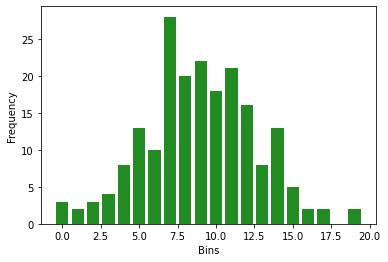

In [ ]:
import matplotlib.pyplot as plt

hist = torch.histc(x, bins=20, out=None)
  
plt.bar(range(20), hist, align='center', color=['forestgreen'])
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.show()